# Dimension Reduction and PCA

### Create 3D Dataset with 2 Variables

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

a = np.random.normal(0, 1, 100) 
b = np.random.normal(0, 1, 100)

x = (3*a) - (2*b)
y = (-7*a) - b
z = (8*a) - (10*b)

A = np.row_stack([x, y, z]) #places data into a matrix stacking each variable as a row
A = A.T
df = pd.DataFrame(data= A
                 , columns =['x','y','z'])
df.head(15)

,x,y,z
0,-2.765682,1.598498,-11.373190
1,0.420065,-1.442333,0.739554
2,0.064037,2.813549,2.610857
3,0.260346,-8.748258,-6.009919
4,-1.246650,-7.425972,-11.835431
5,1.901673,6.792714,14.319324
6,-4.201777,13.017509,-8.558442
7,-7.012180,10.346667,-23.652749
8,-1.807960,3.914268,-5.071832
9,9.429336,-8.041289,36.641774


### Standardize Data

In [2]:
features = ['x', 'y', 'z']

# Separating out the features
A = df.loc[:, features].values #df.loc accesses a group of rows or columns

# Standardizing the features by subtracting the mean
mean_vec = np.mean(A, axis=0) #creating vector of means
A1 = A - mean_vec #subtracting the means and normalizing

pd.DataFrame(data = A1, columns = features).head(15)

,x,y,z
0,-2.745019,1.556798,-11.312724
1,0.440728,-1.484032,0.800020
2,0.084700,2.771850,2.671322
3,0.281009,-8.789957,-5.949453
4,-1.225987,-7.467672,-11.774966
5,1.922336,6.751015,14.379789
6,-4.181114,12.975809,-8.497976
7,-6.991517,10.304967,-23.592283
8,-1.787297,3.872569,-5.011366
9,9.449999,-8.082988,36.702239


### Find Covariance Matrix

In [13]:
M = np.cov(A1.T)
print(M)
M.shape

[[ 10.97360854 -17.18127981  36.20020874]
 [-17.18127981  52.54565017 -35.55886604]
 [ 36.20020874 -35.55886604 136.81130334]]


(3, 3)

### Find Eigenvalues and Eigenvectors

In [52]:
e, v = np.linalg.eig(M) 
# finds the eigenvalues and vectors and stores them separately into e and then v
print (e)
print (v)

[1.60467851e+02 3.21964677e-15 3.98627106e+01]
[[ 0.25804047 -0.96237642 -0.08512783]
 [-0.33914995 -0.17273423  0.92473791]
 [ 0.90465044  0.20974871  0.37096234]]


### Sort Eigenvalues/vectors Largest to Smallest

In [53]:
idx = np.argsort(e)[::-1]
e = e[idx] #orders eigen values based on index of largest to smallest eigenvalues
e = np.real_if_close(e) #adjusts eigenvalues to be real numbers
v = v[:, idx]#adjusts the eigenvectors to correspond to eigenvalues
print(v)

[[ 0.25804047 -0.08512783 -0.96237642]
 [-0.33914995  0.92473791 -0.17273423]
 [ 0.90465044  0.37096234  0.20974871]]


### Determine Amount of Variance and Select Principle Components

In [54]:
expvar = e/e.sum() #will give the percent of variance covered by each eigenvalue/vector
print(expvar) 

[8.01015331e-01 1.98984669e-01 1.60716704e-17]


### Selecting PCs

In [55]:
nvar = 3 #number of variables
ncomp = 2 #number of components
remove = nvar-ncomp
e = e[0:-remove] #indexes from 0 to everything except for the remove indexes at the end
print(e)
v = v[:, :-remove] #all rows and all columns except the removed
print(v)
v.shape

[160.46785145  39.86271061]
[[ 0.25804047 -0.08512783]
 [-0.33914995  0.92473791]
 [ 0.90465044  0.37096234]]


(3, 2)

### Dimension Reduction and Change of Basis for PCA
In this section we will perform matrix multiplication of the standardized data and the vectors of the principal components to get a new data matrix that will have n rows and m columns (where n= # of observations, and m= # of PCs)

In [56]:
PCdata = A1.dot(v)
PCdata.shape
principalDf = pd.DataFrame(data = PCdata
             , columns = ['PC 1', 'PC 2'])
principalDf.head(15)

,PC 1,PC 2
0,-11.470375,-2.523287
1,1.340774,-1.113082
2,1.498396,3.546984
3,-2.328550,-10.359351
4,-8.435922,-11.169342
5,11.215117,11.413635
6,-13.167340,9.202723
7,-26.641793,1.372718
8,-6.308111,1.874232
9,38.382524,5.336045


### Plot Data in Reduced Dimensions

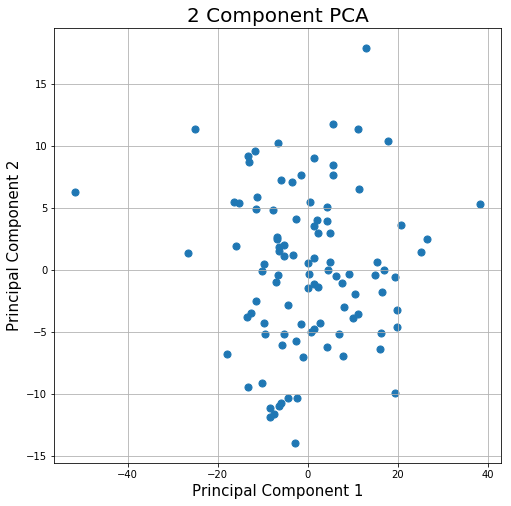

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(principalDf.loc[:, 'PC 1']
               , principalDf.loc[:, 'PC 2']
               , s = 50)
ax.grid()

# Test against PCA packages

## Probabilistic PCA

In [58]:
from sklearn.decomposition import PCA

A2 = StandardScaler().fit_transform(A) #subtracts the mean

#choosing 2 principal components and assigning them to the variable "pca"
pca = PCA(n_components=2) 

#gives you 2D data, with 2 principle components
principalComponents = pca.fit_transform(A2) 
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

principalDf1.head(15)

,PC 1,PC 2
0,1.206339,-0.479389
1,-0.228973,-0.111861
2,0.043412,0.446270
3,-0.370284,-1.271515
4,0.305359,-1.463145
5,-0.620579,1.535526
6,2.140688,0.892444
7,3.253811,-0.250921
8,0.867205,0.125320
9,-4.230819,1.233604


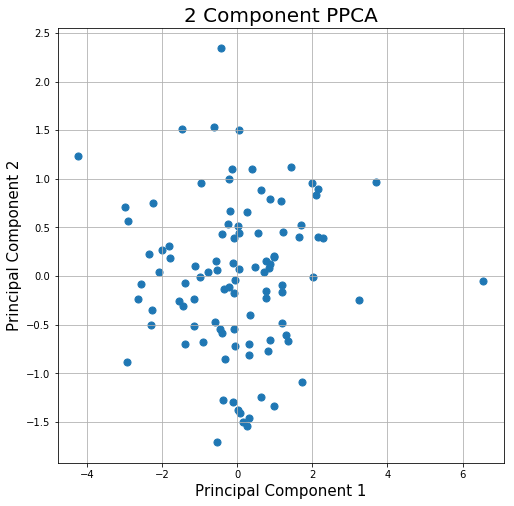

In [59]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PPCA', fontsize = 20)

ax.scatter(principalDf1.loc[:, 'PC 1']
               , principalDf1.loc[:, 'PC 2']
               , s = 50)
ax.grid()

### PCA vs. Probablistic PCA

Significant difference...
- PCA only defines a linear projection of the data so the scope of its application is necessarily somewhat limited 
- Probabilistic PCA is an attempt to account for that and achieve nonlinear PCA in an effort to retain a greater proportion of the variance using fewer components. 
